In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import warnings
warnings.filterwarnings('ignore')

In [24]:
import zipfile

In [50]:
with zipfile.ZipFile('stack-overflow-developer-survey-2020.zip') as zippy:
    zippy.extract('survey_results_public.csv')

In [446]:
# read the csv file
df = pd.read_csv('survey_results_public.csv')

In [447]:
# checking the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [448]:
required_col = ['Employment', 'Country', 'EdLevel','YearsCodePro', 'Ethnicity', 'ConvertedComp']

In [449]:
df = df[required_col]

In [450]:
df.head()

,Employment,Country,EdLevel,YearsCodePro,Ethnicity,ConvertedComp
0,"Independent contractor, freelancer, or self-em...",Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,White or of European descent,NaN
1,Employed full-time,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,NaN,NaN
2,NaN,Russian Federation,NaN,NaN,NaN,NaN
3,NaN,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,White or of European descent,NaN
4,Employed full-time,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,White or of European descent,NaN


In [451]:
# renaming the target column 'ConvertedComp' to 'Salary'
df.rename(columns = {'ConvertedComp' : 'Salary'}, inplace = True)

In [452]:
# checking for null values
df.isnull().sum()/len(df)

Employment      0.009417
Country         0.006035
EdLevel         0.109058
YearsCodePro    0.280976
Ethnicity       0.287197
Salary          0.460821
dtype: float64

In [453]:
# we drop all the rows where the target variable is null
df = df[~df.Salary.isnull()]

In [454]:
df.isnull().sum()/len(df) * 100

Employment       0.112211
Country          0.000000
EdLevel          1.634250
YearsCodePro     0.388422
Ethnicity       13.229370
Salary           0.000000
dtype: float64

<font color = 'blue'>The null values can now be dropped from the other columns without impacting the dataset</font>

In [455]:
df.dropna(inplace = True)

In [456]:
df.head()

,Employment,Country,EdLevel,YearsCodePro,Ethnicity,Salary
7,Employed full-time,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,White or of European descent,116000.0
9,Employed full-time,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,White or of European descent,32315.0
10,Employed full-time,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,White or of European descent,40070.0
11,Employed full-time,Spain,Some college/university study without earning ...,7,White or of European descent,14268.0
12,Employed full-time,Netherlands,"Secondary school (e.g. American high school, G...",20,White or of European descent,38916.0


In [457]:
# We would also like to make predictions for the Full time employed individuals
df = df[df['Employment'] == 'Employed full-time']

In [458]:
# we can now drop the Employment feature
df.drop('Employment', axis = 1, inplace = True)

In [459]:
# Encoding the EdLevel
levels = df.EdLevel.unique()


In [625]:
educational_mapping = {
                levels[2] : 0,
                levels[3] : 0,
                levels[7] : 1,
                levels[8] : 1,
                levels[4] : 1,
                levels[0] : 2,
                levels[1] : 2,
                levels[5] : 2,
                levels[6] : 2,
               }

In [460]:
# Creating a manual encoding (Cause I can't figure Ordinal Encoding with custom categories)
df['Education'] = df.EdLevel.map({
                levels[2] : 0,
                levels[3] : 0,
                levels[7] : 1,
                levels[8] : 1,
                levels[4] : 1,
                levels[0] : 2,
                levels[1] : 2,
                levels[5] : 2,
                levels[6] : 2,
               })

In [461]:
# Encoding the countries 
from sklearn.preprocessing import LabelEncoder

In [462]:
# checking for the countries and their occurence
df.Country.value_counts(normalize = True) * 100

United States                       26.225115
United Kingdom                       7.974732
Germany                              6.634763
India                                5.811639
Canada                               4.035222
                                      ...    
Monaco                               0.003828
Saint Vincent and the Grenadines     0.003828
Swaziland                            0.003828
Niger                                0.003828
Yemen                                0.003828
Name: Country, Length: 148, dtype: float64

<font color=blue>The United States has the largest representation, however many counteries with a smaller representation will clubbed together and dropped as they wouldn't contribute to the prediction </font>

In [463]:
categories = df['Country'].unique()

In [486]:
categorical_map = {}
for i in range(len(categories)):
    if df['Country'].value_counts(normalize = True).values[i]*100 < 1:
        categorical_map[df['Country'].value_counts().index[i]] = 'other'
    else:
        categorical_map[df['Country'].value_counts().index[i]] = df['Country'].value_counts().index[i]

In [491]:
df.Country = df.Country.map(categorical_map)

In [508]:
# Checking for the ethnicity
categorical_map = {}
for i in range(len(df.Ethnicity.unique())):
    if df.Ethnicity.value_counts(normalize = True).values[i] * 100 < 1:
        categorical_map[df.Ethnicity.value_counts().index[i]] = 'other'
    else:
        categorical_map[df.Ethnicity.value_counts().index[i]] = df.Ethnicity.value_counts().index[i]

In [509]:
df.Ethnicity = df.Ethnicity.map(categorical_map)

In [512]:
# encoding the two features Country, Ethnicity
from sklearn.preprocessing import LabelEncoder

In [513]:
le_country = LabelEncoder()
le_ethnicity = LabelEncoder()

In [514]:
le_country.fit(df[['Country']])

LabelEncoder()

In [516]:
df['Country'] = le_country.transform(df[['Country']])

In [517]:
le_ethnicity.fit(df[['Ethnicity']])

LabelEncoder()

In [518]:
df['Ethnicity'] = le_ethnicity.transform(df[['Ethnicity']])

In [519]:
df.head()

,Country,EdLevel,YearsCodePro,Ethnicity,Salary,Education,NewCountry
7,13,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,7,116000.0,2,United States
9,12,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,7,32315.0,2,United Kingdom
10,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,7,40070.0,2,United Kingdom
11,10,Some college/university study without earning ...,7,7,14268.0,0,Spain
12,7,"Secondary school (e.g. American high school, G...",20,7,38916.0,0,Netherlands


In [520]:
# Dropping the columns EdLevel and NewCountry
df.drop(columns = ['EdLevel', 'NewCountry'], inplace = True)

In [521]:
df.head()

,Country,YearsCodePro,Ethnicity,Salary,Education
7,13,13,7,116000.0,2
9,12,4,7,32315.0,2
10,12,2,7,40070.0,2
11,10,7,7,14268.0,0
12,7,20,7,38916.0,0


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26120 entries, 7 to 63955
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       26120 non-null  int32  
 1   YearsCodePro  26120 non-null  object 
 2   Ethnicity     26120 non-null  int32  
 3   Salary        26120 non-null  float64
 4   Education     26120 non-null  int64  
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 1020.3+ KB


In [524]:
# The YearsCodePro is still an object type, we convert it to float

In [525]:
df.YearsCodePro.value_counts()

3                     2771
2                     2592
5                     2344
4                     2110
6                     1723
10                    1553
7                     1390
1                     1388
8                     1372
Less than 1 year       997
12                     849
15                     844
20                     784
9                      749
11                     597
13                     555
14                     436
16                     367
25                     283
18                     273
17                     271
22                     253
21                     218
19                     213
23                     188
30                     154
24                     133
26                      93
27                      82
35                      68
28                      66
32                      54
33                      46
31                      43
29                      39
34                      37
38                      36
4

<font color = 'blue'>We change the less than 1 year to 0.5 and more than 50 years to 50</font>

In [541]:
categorical_map = {}
for i in range(len(df.YearsCodePro.value_counts().index)):
    if df.YearsCodePro.value_counts().index[i] == 'Less than 1 year':
        categorical_map[df.YearsCodePro.value_counts().index[i]] = 0.5
    elif df.YearsCodePro.value_counts().index[i] == 'More than 50 years':
        categorical_map[df.YearsCodePro.value_counts().index[i]] = 50
    else:
        categorical_map[df.YearsCodePro.value_counts().index[i]] = np.float(df.YearsCodePro.value_counts().index[i])

In [544]:
df.YearsCodePro = df.YearsCodePro.map(categorical_map)

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26120 entries, 7 to 63955
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       26120 non-null  int32  
 1   YearsCodePro  26120 non-null  float64
 2   Ethnicity     26120 non-null  int32  
 3   Salary        26120 non-null  float64
 4   Education     26120 non-null  int64  
dtypes: float64(2), int32(2), int64(1)
memory usage: 1020.3 KB


In [547]:
# performing a feature target estimation
import phik

In [558]:
pvalues = []
scores  = []
features= []

y = df['Salary']
x = df.drop('Salary', axis = 1)

for col in x.columns:
    scores.append(phik.phik_from_array(x[col], y, bins = [col]))
    pvalues.append(phik.significance_from_array(x[col],y,bins = [col])[0])
    features.append(col)

In [559]:
temp = pd.DataFrame({'Features' : features, 'Pvalues' : pvalues, 'Scores' : scores})

In [560]:
temp.set_index('Features', inplace = True)

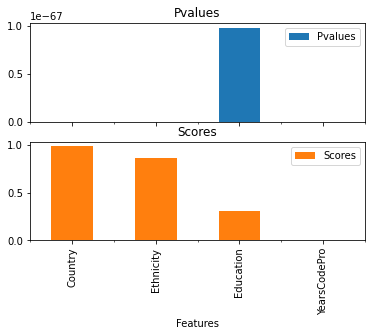

In [565]:
temp.sort_values('Scores', ascending =False).plot.bar(subplots = True)
plt.show()

<font color = 'blue'>Apparently the Country and the Ethnicity have a huge influence on the Salary earned</font>

In [567]:
# building a randomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

In [568]:
rf = RandomForestRegressor()

In [569]:
# splitting the data into a training and test set
from sklearn.model_selection import train_test_split

In [573]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [575]:
# training the model
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [576]:
# making a prediction
ypred = rf.predict(xtest)

In [579]:
# checking to see the loss
from sklearn.metrics import mean_absolute_error

In [583]:
np.sqrt(mean_squared_error(ypred, ytest))

228427.34157897942

In [584]:
# using Cross validation to build a better predictor
from sklearn.model_selection import GridSearchCV

In [586]:
param_grid = {'n_estimators':[100, 200, 300, 500],
              'max_depth': range(2, 10),
              'min_samples_split' : [2, 3, 4, 5]
             }

In [589]:
gscv = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, n_jobs = -1)

In [590]:
gscv.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 500]})

In [591]:
gscv.best_params_

{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 300}

In [593]:
best_model = gscv.best_estimator_

In [595]:
ypred = best_model.predict(xtest)

In [596]:
np.sqrt(mean_squared_error(ypred, ytest))

221716.2789425282

<font color = 'blue'>The new estimator has better fit</font>

In [598]:
import pickle

In [626]:
with open('project.pkl', 'wb') as file:
    pickle.dump([best_model, le_country, le_ethnicity, educational_mapping], file)

In [627]:
with open('project.pkl', 'rb') as file:
    data = pickle.load(file)

In [610]:
test_model = data[0]

In [612]:
import streamlit as st

In [1]:
x.columns

NameError: name 'x' is not defined